# Energy Star Score Prediction

## Assumptions -
1. The Target Variable is a Percentile score and is kind of relative in nature and shall vary alongwith your population mix, mking it difficult to model for the same.Hence for the sake of the case study model development the 'Percentile' values are considered to be actual scores on a scale of 1 to 100 and appropriate Treatment shall be done on the Predicted values to get Relative 'Percentile' values.

2.The Category of "Failed to Submit" is kind of a Human nature and shall be difficult to Predict in advance and hence is eliminated from the Prediction Exercise.We might still be able to predict it using the data available , but the correlations would be spurious and lead to an unstable model.

3.The Category 'Not Covered' depends on the eligibility of the Properties to qualify for the Benchmarking a per the DOF. So the criteria using the below 3 criteria appropriate Suppression on the Dataset to be scored are suggested to identify this category in advance and hence is eliminated from Prediction. The criteria for Suppression are,
    a. DOF BEnchmarking Cover List 2020 (Source -https://www1.nyc.gov/site/buildings/business/compliance-instructions.page)
    b.Building Benchmarking Qualification Criteria as mentioned in LL84 Report of 2013, it was assumed that it will hold good in 2017 and today as well (Source:https://www.energystar.gov/sites/default/files/buildings/tools/The%20New%20York%20City%20Local%20Law%2084%20Benchmarking%20Report%2C%202013.pdf)
    
4.As the Data Dictionary was not available even online, the Variable are interpreted as felt convenient.

5.All Weather Normalised Variables are considered over there non-normalised counterparts assuming the normalised variables would nullify effect on Weather on fluctuations in Energy Consumption.
6.Due to time Limit , I have tried to Demonstrate what can be done as part of the Exploratory Analysis with Respect to numeric and Categorical Variables

## Import Data into Python

In [1]:
import pandas as pd
d1= pd.DataFrame(pd.read_csv("Usecase1_Dataset.csv"))
d1.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


## Data Pre-processing

In [2]:
d1.info() #List Columns in the Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [2]:
#Eliminate columns Redundant and Retain the ones deemed useful
sel_cols=['Order', 'Property Id', 'Parent Property Id', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'Borough', 'DOF Gross Floor Area', 'Primary Property Type - Self Selected', 'Largest Property Use Type', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)', 'Water Use (All Water Sources) (kgal)', 'Water Intensity (All Water Sources) (gal/ft²)', 'Water Required?', 'DOF Benchmarking Submission Status']

print(sel_cols)

d2 = d1[sel_cols]
d2.head() #Ensure the Desired Variables are Retained

['Order', 'Property Id', 'Parent Property Id', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'Borough', 'DOF Gross Floor Area', 'Primary Property Type - Self Selected', 'Largest Property Use Type', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)', 'Weather Normal

,Order,Property Id,Parent Property Id,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),...,Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Water Required?,DOF Benchmarking Submission Status
0,1,13286,13286,1013160001,1013160001,Manhattan,289356.0,Office,Office,293447,...,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,No,In Compliance
1,2,28400,28400,1021380040,1-02138-0040,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,...,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,No,In Compliance
2,3,4778226,28400,1021380030,1-02138-0030,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,...,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,No,In Compliance
3,4,4778267,28400,1021390001,1-02139-0001,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,...,Not Available,Not Available,0,0,0,1305748,Not Available,Not Available,No,In Compliance
4,5,4778288,28400,1021390085,1-02139-0085,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,...,Not Available,Not Available,0,0,0,179694,Not Available,Not Available,No,In Compliance


In [3]:
#Quick Summary of Data Variables 
from IPython.display import display
pd.options.display.max_columns = None
print (d2.describe(include='all'))

               Order   Property Id                   Parent Property Id  \
count   11746.000000  1.174600e+04                                11746   
unique           NaN           NaN                                  102   
top              NaN           NaN  Not Applicable: Standalone Property   
freq             NaN           NaN                                11324   
mean     7185.759578  3.642958e+06                                  NaN   
std      4323.859984  1.049070e+06                                  NaN   
min         1.000000  7.365000e+03                                  NaN   
25%      3428.250000  2.747222e+06                                  NaN   
50%      6986.500000  3.236404e+06                                  NaN   
75%     11054.500000  4.409092e+06                                  NaN   
max     14993.000000  5.991312e+06                                  NaN   

       BBL - 10 digits NYC Borough, Block and Lot (BBL) self-reported  \
count            11735    

In [4]:
#Variable Headings Cleaned for Easier Referencing in code.
d2.columns = d2.columns.str.replace(' ', '_')
d2.columns = d2.columns.str.replace("[() # , / & ]", '')
d2.columns = d2.columns.str.replace('-', '')
d2.columns = d2.columns.str.replace('ft²', 'sqft')
d2.head()

,Order,Property_Id,Parent_Property_Id,BBL__10_digits,NYC_Borough_Block_and_Lot_BBL_selfreported,Borough,DOF_Gross_Floor_Area,Primary_Property_Type__Self_Selected,Largest_Property_Use_Type,Largest_Property_Use_Type__Gross_Floor_Area_sqft,2nd_Largest_Property_Use_Type,2nd_Largest_Property_Use__Gross_Floor_Area_sqft,3rd_Largest_Property_Use_Type,3rd_Largest_Property_Use_Type__Gross_Floor_Area_sqft,Year_Built,Number_of_Buildings__Selfreported,Occupancy,Metered_Areas_Energy,Metered_Areas__Water,ENERGY_STAR_Score,Weather_Normalized_Site_EUI_kBtusqft,Weather_Normalized_Site_Electricity_Intensity_kWhsqft,Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft,Weather_Normalized_Source_EUI_kBtusqft,Fuel_Oil_1_Use_kBtu,Fuel_Oil_2_Use_kBtu,Fuel_Oil_4_Use_kBtu,Fuel_Oil_5__6_Use_kBtu,Diesel_2_Use_kBtu,District_Steam_Use_kBtu,Natural_Gas_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use__Grid_Purchase_kBtu,Weather_Normalized_Site_Electricity_kWh,Total_GHG_Emissions_Metric_Tons_CO2e,Direct_GHG_Emissions_Metric_Tons_CO2e,Indirect_GHG_Emissions_Metric_Tons_CO2e,Property_GFA__SelfReported_sqft,Water_Use_All_Water_Sources_kgal,Water_Intensity_All_Water_Sources_galsqft,Water_Required?,DOF_Benchmarking_Submission_Status
0,1,13286,13286,1013160001,1013160001,Manhattan,289356.0,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,No,In Compliance
1,2,28400,28400,1021380040,1-02138-0040,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,No,In Compliance
2,3,4778226,28400,1021380030,1-02138-0030,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,No,In Compliance
3,4,4778267,28400,1021390001,1-02139-0001,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,Not Available,Not Available,Not Available,Not Available,1971,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,1305748,Not Available,Not Available,No,In Compliance
4,5,4778288,28400,1021390085,1-02139-0085,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,Not Available,Not Available,Not Available,Not Available,1932,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,179694,Not Available,Not Available,No,In Compliance


In [5]:
#External Data on Benchmarking Eligibility of Properties(Reference Link Shared in assumptions)
d3=pd.DataFrame(pd.read_csv("Covered_List.csv"))
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24071 entries, 0 to 24070
Data columns (total 1 columns):
BBL    24071 non-null int64
dtypes: int64(1)
memory usage: 188.1 KB


In [6]:
#Getting columns in Order to enable Merging Later
pd.options.mode.chained_assignment = None
d2.BBL__10_digits = d2.BBL__10_digits.str.replace("[; ,]", ';')
d2['BBL__10_digits2'], d2['BBL__10_digits3'] = d2['BBL__10_digits'].str.split(';', 1).str
d2.head()

type(d3)

d2.astype({'BBL__10_digits2': 'str'})
d3['BBL']=d3.astype({'BBL': 'str'})

print(d3['BBL'].dtype)
print(d2['BBL__10_digits2'].dtype)

object
object


In [7]:
#Merge Datasets and Define Indicator For Buildings Eligible for Benchmarking
d_merge=pd.merge(d2,d3,left_on = 'BBL__10_digits2', right_on = 'BBL', how = 'left')
d_merge['is_covered']=d_merge['BBL__10_digits2']==d_merge['BBL']
d_merge.head()

,Order,Property_Id,Parent_Property_Id,BBL__10_digits,NYC_Borough_Block_and_Lot_BBL_selfreported,Borough,DOF_Gross_Floor_Area,Primary_Property_Type__Self_Selected,Largest_Property_Use_Type,Largest_Property_Use_Type__Gross_Floor_Area_sqft,2nd_Largest_Property_Use_Type,2nd_Largest_Property_Use__Gross_Floor_Area_sqft,3rd_Largest_Property_Use_Type,3rd_Largest_Property_Use_Type__Gross_Floor_Area_sqft,Year_Built,Number_of_Buildings__Selfreported,Occupancy,Metered_Areas_Energy,Metered_Areas__Water,ENERGY_STAR_Score,Weather_Normalized_Site_EUI_kBtusqft,Weather_Normalized_Site_Electricity_Intensity_kWhsqft,Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft,Weather_Normalized_Source_EUI_kBtusqft,Fuel_Oil_1_Use_kBtu,Fuel_Oil_2_Use_kBtu,Fuel_Oil_4_Use_kBtu,Fuel_Oil_5__6_Use_kBtu,Diesel_2_Use_kBtu,District_Steam_Use_kBtu,Natural_Gas_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use__Grid_Purchase_kBtu,Weather_Normalized_Site_Electricity_kWh,Total_GHG_Emissions_Metric_Tons_CO2e,Direct_GHG_Emissions_Metric_Tons_CO2e,Indirect_GHG_Emissions_Metric_Tons_CO2e,Property_GFA__SelfReported_sqft,Water_Use_All_Water_Sources_kgal,Water_Intensity_All_Water_Sources_galsqft,Water_Required?,DOF_Benchmarking_Submission_Status,BBL__10_digits2,BBL__10_digits3,BBL,is_covered
0,1,13286,13286,1013160001,1013160001,Manhattan,289356.0,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,No,In Compliance,1013160001,NaN,1013160001,True
1,2,28400,28400,1021380040,1-02138-0040,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,No,In Compliance,1021380040,NaN,1021380040,True
2,3,4778226,28400,1021380030,1-02138-0030,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,No,In Compliance,1021380030,NaN,1021380030,True
3,4,4778267,28400,1021390001,1-02139-0001,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,Not Available,Not Available,Not Available,Not Available,1971,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,1305748,Not Available,Not Available,No,In Compliance,1021390001,NaN,1021390001,True
4,5,4778288,28400,1021390085,1-02139-0085,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,Not Available,Not Available,Not Available,Not Available,1932,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,179694,Not Available,Not Available,No,In Compliance,1021390085,NaN,1021390085,True


In [13]:
## Target Variable Exploration
d_merge['ENERGY_STAR_Score'].value_counts()


Not Available    2104
100               649
1                 299
99                162
80                144
84                142
83                138
86                138
88                136
87                128
82                128
73                128
89                127
85                126
79                126
81                126
93                125
92                124
74                124
77                123
98                122
90                120
78                119
67                119
95                119
68                118
76                118
69                114
91                112
65                112
                 ... 
20                 67
39                 66
45                 66
46                 66
30                 64
13                 64
47                 61
26                 60
19                 60
16                 59
6                  59
23                 58
24                 58
5                  57
8         

In [14]:
#Benchmarking Eligibility Quick Check 
d_merge['is_covered'].value_counts()

True     11223
False      523
Name: is_covered, dtype: int64

In [15]:
#Check Eligibility for Benchmarking for Energy Score 'Not Available' Records
d_merge[d_merge['ENERGY_STAR_Score']=='Not Available'].groupby(['ENERGY_STAR_Score', 'is_covered']).size()

ENERGY_STAR_Score  is_covered
Not Available      False          143
                   True          1961
dtype: int64

In [8]:
#Define Segments to tag Various Segment like "Not Covered", "Failed to Submit" and "Eligible" (For Model Development)
import numpy as np

criteria= [
    (d_merge['is_covered']== False),
    (d_merge['Number_of_Buildings__Selfreported'] == 1) & (d_merge['DOF_Gross_Floor_Area'] < 25000),
    (d_merge['Number_of_Buildings__Selfreported'] > 1) & (d_merge['DOF_Gross_Floor_Area'] < 50000),
    (d_merge['DOF_Benchmarking_Submission_Status'] != 'In Compliance') ,
    (d_merge['ENERGY_STAR_Score'] == 'Not Available'),

    (d_merge['ENERGY_STAR_Score'] != 'Not Available') 
     ]

values = ['Not_Covered','Not_Covered', 'Not_Covered','Failed_To_Submit','Failed_To_Submit','Eligible']

d_merge['Energy_Category'] = np.select(criteria, values)

# display updated DataFrame
d_merge.head()

,Order,Property_Id,Parent_Property_Id,BBL__10_digits,NYC_Borough_Block_and_Lot_BBL_selfreported,Borough,DOF_Gross_Floor_Area,Primary_Property_Type__Self_Selected,Largest_Property_Use_Type,Largest_Property_Use_Type__Gross_Floor_Area_sqft,2nd_Largest_Property_Use_Type,2nd_Largest_Property_Use__Gross_Floor_Area_sqft,3rd_Largest_Property_Use_Type,3rd_Largest_Property_Use_Type__Gross_Floor_Area_sqft,Year_Built,Number_of_Buildings__Selfreported,Occupancy,Metered_Areas_Energy,Metered_Areas__Water,ENERGY_STAR_Score,Weather_Normalized_Site_EUI_kBtusqft,Weather_Normalized_Site_Electricity_Intensity_kWhsqft,Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft,Weather_Normalized_Source_EUI_kBtusqft,Fuel_Oil_1_Use_kBtu,Fuel_Oil_2_Use_kBtu,Fuel_Oil_4_Use_kBtu,Fuel_Oil_5__6_Use_kBtu,Diesel_2_Use_kBtu,District_Steam_Use_kBtu,Natural_Gas_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use__Grid_Purchase_kBtu,Weather_Normalized_Site_Electricity_kWh,Total_GHG_Emissions_Metric_Tons_CO2e,Direct_GHG_Emissions_Metric_Tons_CO2e,Indirect_GHG_Emissions_Metric_Tons_CO2e,Property_GFA__SelfReported_sqft,Water_Use_All_Water_Sources_kgal,Water_Intensity_All_Water_Sources_galsqft,Water_Required?,DOF_Benchmarking_Submission_Status,BBL__10_digits2,BBL__10_digits3,BBL,is_covered,Energy_Category
0,1,13286,13286,1013160001,1013160001,Manhattan,289356.0,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,No,In Compliance,1013160001,NaN,1013160001,True,Failed_To_Submit
1,2,28400,28400,1021380040,1-02138-0040,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,No,In Compliance,1021380040,NaN,1021380040,True,Eligible
2,3,4778226,28400,1021380030,1-02138-0030,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,No,In Compliance,1021380030,NaN,1021380030,True,Failed_To_Submit
3,4,4778267,28400,1021390001,1-02139-0001,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,Not Available,Not Available,Not Available,Not Available,1971,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,1305748,Not Available,Not Available,No,In Compliance,1021390001,NaN,1021390001,True,Failed_To_Submit
4,5,4778288,28400,1021390085,1-02139-0085,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,Not Available,Not Available,Not Available,Not Available,1932,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,179694,Not Available,Not Available,No,In Compliance,1021390085,NaN,1021390085,True,Failed_To_Submit


In [18]:
d_merge['Energy_Category'].value_counts() #Frequency By Segments

Eligible            9245
Failed_To_Submit    1978
Not_Covered          523
Name: Energy_Category, dtype: int64

## New Feature Creation

In [9]:
#Calculate Borough wise 'Mean' of Key Energy Metrics, to be used Later for calculating Deviations From Neighbourhood for each Property
d_ml=d_merge[d_merge['Energy_Category']=='Eligible']
d_ml['Building_Age']=2017-d_ml['Year_Built']
  
col=  ['Weather_Normalized_Site_EUI_kBtusqft','Weather_Normalized_Site_Electricity_Intensity_kWhsqft','Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft','Weather_Normalized_Source_EUI_kBtusqft']
type(col)
var= ['V1','V2','V3','V4']
type(var)
dn=pd.DataFrame()
for i in col :
    d_ml[i]=d_ml[i].replace(['Not Available'],0)
    #print(d_ml[i].dtype)
    d_ml[i]= pd.to_numeric(d_ml[i])
    #print(d_ml[i].dtype)
    grp = d_ml.groupby('Borough')
    j=grp[i].agg([np.mean])
    #j.set_index('Borough')
    j.columns = i +'_' + j.columns.values
    #dn.append(j)
    dn = pd.concat([dn ,j], axis=1,sort=True)         
                    

d_ml2=pd.merge(d_ml,dn,left_on = 'Borough', right_on = 'Borough', how = 'left')

d_ml2.head()
     

,Order,Property_Id,Parent_Property_Id,BBL__10_digits,NYC_Borough_Block_and_Lot_BBL_selfreported,Borough,DOF_Gross_Floor_Area,Primary_Property_Type__Self_Selected,Largest_Property_Use_Type,Largest_Property_Use_Type__Gross_Floor_Area_sqft,2nd_Largest_Property_Use_Type,2nd_Largest_Property_Use__Gross_Floor_Area_sqft,3rd_Largest_Property_Use_Type,3rd_Largest_Property_Use_Type__Gross_Floor_Area_sqft,Year_Built,Number_of_Buildings__Selfreported,Occupancy,Metered_Areas_Energy,Metered_Areas__Water,ENERGY_STAR_Score,Weather_Normalized_Site_EUI_kBtusqft,Weather_Normalized_Site_Electricity_Intensity_kWhsqft,Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft,Weather_Normalized_Source_EUI_kBtusqft,Fuel_Oil_1_Use_kBtu,Fuel_Oil_2_Use_kBtu,Fuel_Oil_4_Use_kBtu,Fuel_Oil_5__6_Use_kBtu,Diesel_2_Use_kBtu,District_Steam_Use_kBtu,Natural_Gas_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use__Grid_Purchase_kBtu,Weather_Normalized_Site_Electricity_kWh,Total_GHG_Emissions_Metric_Tons_CO2e,Direct_GHG_Emissions_Metric_Tons_CO2e,Indirect_GHG_Emissions_Metric_Tons_CO2e,Property_GFA__SelfReported_sqft,Water_Use_All_Water_Sources_kgal,Water_Intensity_All_Water_Sources_galsqft,Water_Required?,DOF_Benchmarking_Submission_Status,BBL__10_digits2,BBL__10_digits3,BBL,is_covered,Energy_Category,Building_Age,Weather_Normalized_Site_EUI_kBtusqft_mean,Weather_Normalized_Site_Electricity_Intensity_kWhsqft_mean,Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft_mean,Weather_Normalized_Source_EUI_kBtusqft_mean
0,2,28400,28400,1021380040,1-02138-0040,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,No,In Compliance,1021380040,NaN,1021380040,True,Eligible,48,198.766556,8.950051,0.284005,287.652372
1,6,28402,28402,1014800001,1-01480-0001,Manhattan,2230742.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),2971874,Not Available,Not Available,Not Available,Not Available,1932,12,100,Whole Building,Whole Building,55,359.0,8.3,4.8,411.5,Not Available,2.00832154E7,Not Available,Not Available,Not Available,-4.690796909E8,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,54429.8,77564.1,-23134.3,2971874,Not Available,Not Available,No,In Compliance,1014800001,NaN,1014800001,True,Eligible,85,198.766556,8.950051,0.284005,287.652372
2,15,2637863,2637863,3002320001;3002380035,3002320001;3002380035,NaN,NaN,Multifamily Housing,Multifamily Housing,412503,Other,20000,Parking,18800,1903,2,100,Whole Building,Whole Building,93,0.0,7.5,0.0,0.0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2047200,20472,11241926.1,3249755.2,1194,150.8,1043.2,432503,22061,51.01,Yes,In Compliance,3002320001,3002380035,3002320001,True,Eligible,114,NaN,NaN,NaN,NaN
3,16,5871253,2637863,3002380035,3002380035,Brooklyn,212656.0,Multifamily Housing,Multifamily Housing,162656,Parking,40000,Retail Store,10000,1903,1,100,Whole Building,Not Available,1,316.8,5.8,3.0,374.2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,4.75229012E7,512710.7,3477064.5,1004824,2846.8,2524.2,322.7,172656,Not Available,Not Available,NaN,In Compliance,3002380035,NaN,3002380035,True,Eligible,114,572.602865,5.644032,5.574111,638.904721
4,17,2777235,2777235,5033550032;5033550065,5033550032;5-03355-0065,NaN,NaN,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),567517,Not Available,Not Available,Not Available,Not Available,1950,2,100,Whole Building,Whole Building,80,0.0,32.2,2.2,0.0,Not Available,9230304.1,Not Available,Not Available,Not Available,Not Available,1.284867131E8,1255514.1,62425429.2,1.82958446E7,13302.6,7509.5,5793.1,56751

In [52]:
print (d_ml2.describe(include='all')) #Data Check to Ensure Merge went well

               Order   Property_Id                   Parent_Property_Id  \
count    9245.000000  9.245000e+03                                 9245   
unique           NaN           NaN                                   75   
top              NaN           NaN  Not Applicable: Standalone Property   
freq             NaN           NaN                                 9027   
mean     7396.903083  3.646570e+06                                  NaN   
std      4235.677399  1.047698e+06                                  NaN   
min         2.000000  7.365000e+03                                  NaN   
25%      3674.000000  2.771036e+06                                  NaN   
50%      7324.000000  3.280228e+06                                  NaN   
75%     11172.000000  4.409023e+06                                  NaN   
max     14929.000000  5.991312e+06                                  NaN   

       BBL__10_digits NYC_Borough_Block_and_Lot_BBL_selfreported    Borough  \
count            924

In [10]:
#Using the Earlier Calculated Averages At Borough level, Defined Squared Deviations from neighbourhood Average for the 4 Major Enerygy Variables.
#Also Defined New Variables for Energy Score Buckets , Average Per Sq ft Emissions, Total fossil Fuel Consumption
d_ml2['ENERGY_STAR_Score']= pd.to_numeric(d_ml2['ENERGY_STAR_Score'])
d_ml2['Total_GHG_Emissions_Metric_Tons_CO2e']=d_ml2['Total_GHG_Emissions_Metric_Tons_CO2e'].replace(['Not Available'],0)
d_ml2['Total_GHG_Emissions_Metric_Tons_CO2e']= pd.to_numeric(d_ml2['Total_GHG_Emissions_Metric_Tons_CO2e'])
d_ml2['DOF_Gross_Floor_Area']= pd.to_numeric(d_ml2['DOF_Gross_Floor_Area'])
#print(d3['BBL'].dtype)
Rating_Range= [
    (d_ml2['ENERGY_STAR_Score']< 50),
    (d_ml2['ENERGY_STAR_Score']>= 50) & (d_ml2['ENERGY_STAR_Score']< 70),
    (d_ml2['ENERGY_STAR_Score']>= 70) & (d_ml2['ENERGY_STAR_Score']< 85),
    (d_ml2['ENERGY_STAR_Score']>= 85) 
     ]

Rating_values = ['D','C', 'B','A']


d_ml['ENERGY_STAR_Score']= pd.to_numeric(d_ml['ENERGY_STAR_Score'])
d_ml2['Energy_Ratings'] = np.select(Rating_Range, Rating_values)
d_ml2['Sqr_Dev_Weather_Normalized_Site_EUI_kBtusqft']=(d_ml2['Weather_Normalized_Site_EUI_kBtusqft'] - d_ml2['Weather_Normalized_Site_EUI_kBtusqft_mean'])**2
d_ml2['Sqr_Dev_Weather_Normalized_Site_Electricity_Intensity_kWhsqft']=(d_ml2['Weather_Normalized_Site_Electricity_Intensity_kWhsqft'] - d_ml2['Weather_Normalized_Site_Electricity_Intensity_kWhsqft_mean'])**2
d_ml2['Sqr_Dev_Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft']=(d_ml2['Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft'] - d_ml2['Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft_mean'])**2
d_ml2['Sqr_Dev_Weather_Normalized_Source_EUI_kBtusqft']=(d_ml2['Weather_Normalized_Source_EUI_kBtusqft'] - d_ml2['Weather_Normalized_Source_EUI_kBtusqft_mean'])**2
d_ml2['GHG_Emission_per_Sqr_Ft']=d_ml2['Total_GHG_Emissions_Metric_Tons_CO2e']/d_ml2['DOF_Gross_Floor_Area']
d_ml2['Total_Fossil_Fuel_Consumption']=d_ml2['Fuel_Oil_1_Use_kBtu']+d_ml2['Fuel_Oil_2_Use_kBtu']+d_ml2['Fuel_Oil_4_Use_kBtu']+d_ml2['Fuel_Oil_5__6_Use_kBtu']+d_ml2['Diesel_2_Use_kBtu']
print(d_ml2['Energy_Ratings'].value_counts())
print(d_ml2[-5:-1].describe())

D    3189
A    2391
C    1906
B    1759
Name: Energy_Ratings, dtype: int64
              Order   Property_Id  DOF_Gross_Floor_Area   Year_Built  \
count      4.000000  4.000000e+00              4.000000     4.000000   
mean   14920.500000  3.714054e+06         208446.000000  1965.750000   
std        7.047458  1.261102e+06         121025.785352     3.947573   
min    14914.000000  2.630964e+06          67424.000000  1961.000000   
25%    14914.750000  2.630967e+06         141890.000000  1963.250000   
50%    14920.000000  3.614794e+06         206780.000000  1966.500000   
75%    14925.750000  4.697880e+06         273336.000000  1969.000000   
max    14928.000000  4.995662e+06         352800.000000  1969.000000   

       Number_of_Buildings__Selfreported  Occupancy  ENERGY_STAR_Score  \
count                                4.0        4.0           4.000000   
mean                                 1.0       97.5          57.500000   
std                                  0.0        5.0   

## Exploratory Analysis (Numeric)

In [29]:
 #Exploratory on Numeric Variables
    es = d_ml2.groupby('Energy_Ratings').mean()
print(es)

                      Order   Property_Id  DOF_Gross_Floor_Area   Year_Built  \
Energy_Ratings                                                                 
A               7346.403597  3.663093e+06         160504.482338  1944.236303   
B               7480.608300  3.527510e+06         175746.664575  1944.990335   
C               7768.937041  3.601446e+06         156705.192328  1948.814795   
D               7166.238319  3.726821e+06         155910.998425  1952.929445   

                Number_of_Buildings__Selfreported  Occupancy  \
Energy_Ratings                                                 
A                                        1.172313  98.795483   
B                                        1.247868  99.104605   
C                                        1.107030  99.315320   
D                                        1.451239  99.172154   

                ENERGY_STAR_Score  Weather_Normalized_Site_EUI_kBtusqft  \
Energy_Ratings                                             

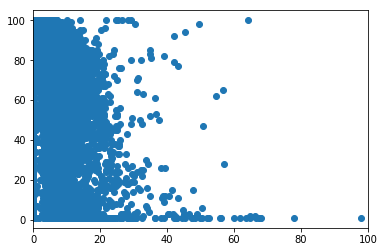

In [35]:
#Scatter Plot 1
import matplotlib.pyplot as plt
plt.plot( 'Weather_Normalized_Site_Electricity_Intensity_kWhsqft', 'ENERGY_STAR_Score', data=d_ml2, linestyle='none', marker='o')
plt.xlim([0, 100])
#plt.ylim([-3, 3])
plt.show()

In [12]:
#Scatter Plot 2
import matplotlib.pyplot as plt
plt.plot( 'Total_GHG_Emissions_Metric_Tons_CO2e', 'ENERGY_STAR_Score', data=d_ml2, linestyle='none', marker='o')
plt.xlim([0, 100])
#plt.ylim([-3, 3])
plt.show()

<Figure size 640x480 with 1 Axes>

                                                       Order  Property_Id  \
Order                                               1.000000     0.067294   
Property_Id                                         0.067294     1.000000   
DOF_Gross_Floor_Area                               -0.169918    -0.098390   
Year_Built                                          0.152674     0.055970   
Number_of_Buildings__Selfreported                   0.064020    -0.011823   
Occupancy                                           0.060419    -0.118030   
ENERGY_STAR_Score                                   0.038787    -0.046928   
Weather_Normalized_Site_EUI_kBtusqft                0.002277     0.008602   
Weather_Normalized_Site_Electricity_Intensity_k...  0.008613     0.002048   
Weather_Normalized_Site_Natural_Gas_Intensity_t...  0.007657     0.007616   
Weather_Normalized_Source_EUI_kBtusqft              0.002106     0.008841   
Total_GHG_Emissions_Metric_Tons_CO2e               -0.018792     0.004072   

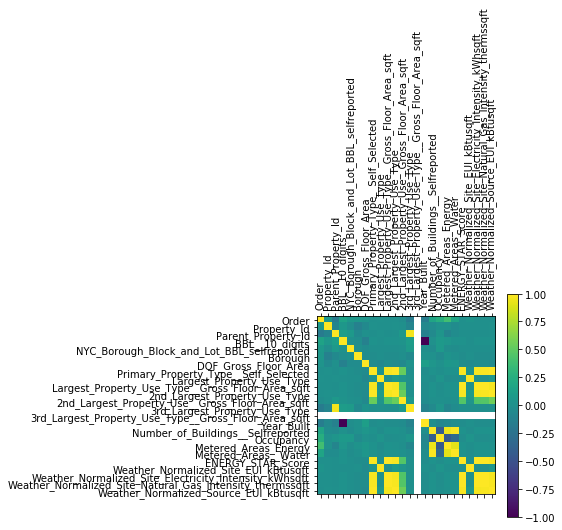

In [36]:
#Correlation Matrix tp evaluate Relationship with Target
print(d_ml2.corr())
plt.matshow(d_ml2.corr())
plt.colorbar()
plt.xticks(range(24),d_ml2.columns,rotation='vertical')
plt.yticks(range(24),d_ml2.columns)
plt.show()

## Exploratory Analysis (Categorical)

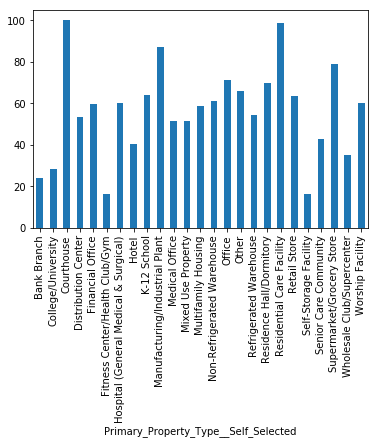

In [37]:
ptype_avg = d_ml2.groupby('Primary_Property_Type__Self_Selected')['ENERGY_STAR_Score'].mean()
ptype_avg.plot.bar(x='Primary_Property_Type__Self_Selected', y='mean', rot=90)

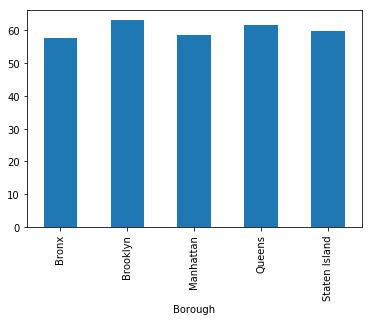

In [61]:
bor_avg = d_ml2.groupby('Borough')['ENERGY_STAR_Score'].mean()
bor_avg.plot.bar(x='Borough', y='mean', rot=90)

## Missing Value Treatment

In [11]:
from numpy import nan
d_ml3=d_ml2.replace('Not Available',nan)
# count the number of nan values in each column
missing_count=pd.DataFrame(d_ml3.isnull().sum())
#missing_count.columns=['Variable','Sum']

missing_count['pc_missing']=missing_count/9245 #9245 Eligible Records
var_list=list(missing_count[missing_count['pc_missing']<=0.3].index)
print(var_list)

['Order', 'Property_Id', 'Parent_Property_Id', 'BBL__10_digits', 'NYC_Borough_Block_and_Lot_BBL_selfreported', 'Borough', 'DOF_Gross_Floor_Area', 'Primary_Property_Type__Self_Selected', 'Largest_Property_Use_Type', 'Largest_Property_Use_Type__Gross_Floor_Area_sqft', 'Year_Built', 'Number_of_Buildings__Selfreported', 'Occupancy', 'Metered_Areas_Energy', 'ENERGY_STAR_Score', 'Weather_Normalized_Site_EUI_kBtusqft', 'Weather_Normalized_Site_Electricity_Intensity_kWhsqft', 'Weather_Normalized_Site_Natural_Gas_Intensity_thermssqft', 'Weather_Normalized_Source_EUI_kBtusqft', 'Natural_Gas_Use_kBtu', 'Weather_Normalized_Site_Natural_Gas_Use_therms', 'Electricity_Use__Grid_Purchase_kBtu', 'Weather_Normalized_Site_Electricity_kWh', 'Total_GHG_Emissions_Metric_Tons_CO2e', 'Direct_GHG_Emissions_Metric_Tons_CO2e', 'Indirect_GHG_Emissions_Metric_Tons_CO2e', 'Property_GFA__SelfReported_sqft', 'Water_Required?', 'DOF_Benchmarking_Submission_Status', 'BBL__10_digits2', 'BBL', 'is_covered', 'Energy_Categ

In [12]:
d_ml4 = d_ml3[var_list]
d_ml4.fillna(0, inplace=True) #Replacing it with zero's as most of the metrics are consumption related and its more appropriate to assume no consumption rather than average consumption, as it may elevate score in the Percentile scale at the end.

d_ml4.isnull().sum()

Order                                                               0
Property_Id                                                         0
Parent_Property_Id                                                  0
BBL__10_digits                                                      0
NYC_Borough_Block_and_Lot_BBL_selfreported                          0
Borough                                                             0
DOF_Gross_Floor_Area                                                0
Primary_Property_Type__Self_Selected                                0
Largest_Property_Use_Type                                           0
Largest_Property_Use_Type__Gross_Floor_Area_sqft                    0
Year_Built                                                          0
Number_of_Buildings__Selfreported                                   0
Occupancy                                                           0
Metered_Areas_Energy                                                0
ENERGY_STAR_Score   

In [13]:
dml4_num= d_ml4.select_dtypes(include=['integer','float'])
#dml4_num.info
d_ml4_corr= dml4_num.corr()['ENERGY_STAR_Score'].abs()
#d_ml4_corr.head(30)
var_list2=dml4_num.drop(d_ml4_corr[d_ml4_corr<0.03].index, axis=1)
var_list2=list(var_list2)
dml5_num=dml4_num[var_list2]

#### The ideal next steps here should be Continue to Eliminate variables based on VIF and Variable clustering (using R-sqr ratio), but since the no. of variables is less ..we will procede to Model Development

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

dml5_train, dml5_test = train_test_split(dml5_num, test_size=0.3, random_state=42)
Train_Target=dml5_train['ENERGY_STAR_Score']
Train_Indep=dml5_train.drop('ENERGY_STAR_Score',1)
Test_Target=dml5_test['ENERGY_STAR_Score']
Test_Indep=dml5_test.drop('ENERGY_STAR_Score',1)

model=linear_model.LinearRegression().fit(Train_Indep,Train_Target)
Test_pred=model.predict(Test_Indep)
MSE=mean_squared_error(Test_Target, Test_pred)
print(model.score(Test_Indep, Test_Target))
print(MSE)


0.053678820226834234
813.4147323563662
